In [1]:
import pandas as pd
import numpy as np
import orga_functions as org
import matplotlib.pyplot as plt

In [2]:
# read in the dataframe
path = org.path("02_AlleFeatureList.csv")
feature_df = pd.read_csv(path, sep =";", index_col='names')

In [3]:
feature_df

,mean,25%,50%,75%,min,max
names,,,,,,
co_gt,2.168604,1.1000,1.8000,2.9000,0.1000,5.600
pt08_s1_co,1098.303412,932.0000,1061.0000,1234.0000,647.0000,1687.000
nmhc_gt,218.607666,66.0000,145.0000,297.0000,0.1000,643.500
c6h6_gt,10.458205,4.7000,8.6000,14.4000,0.1000,28.950
pt08_s2_nmhc,953.579453,749.0000,925.0000,1130.0000,749.0000,1701.500
nox_gt,232.360072,89.0000,164.0000,303.7500,0.1000,625.875
pt08_s3_nox,848.762615,672.0000,818.0000,984.0000,204.0000,1452.000
no2_gt,106.251831,73.0000,103.0000,132.0000,0.1000,220.500
pt08_s4_no2,1507.352834,1305.0000,1508.0000,1707.0000,702.0000,2310.000


In [4]:
df = pd.read_csv(org.path("01_AirQuality_processed.csv"), sep=';', index_col='date')
#df = pd.read_csv(org.path("01_AirQuality_processed.csv"), sep=';')

In [5]:
# not necessary (?)
#df.drop(columns =["nmhc_gt"], inplace =True)
#df

In [6]:
df

,co_gt,pt08_s1_co,nmhc_gt,c6h6_gt,pt08_s2_nmhc,nox_gt,pt08_s3_nox,no2_gt,pt08_s4_no2,pt08_s5_o3,t,rh,ah
date,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
2004-03-10 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2004-03-10 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
2004-03-10 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
2004-03-10 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-02-06 19:00:00,1.6,985.0,NaN,4.5,NaN,227.0,891.0,165.0,875.0,774.0,6.0,38.0,0.3584
2005-02-06 20:00:00,1.8,1002.0,NaN,5.3,780.0,252.0,855.0,179.0,892.0,857.0,5.8,36.4,0.3385
2005-02-06 21:00:00,1.4,938.0,NaN,3.7,NaN,193.0,937.0,149.0,805.0,737.0,5.8,35.4,0.3286


In [7]:
# Are there any missing value???
df.isnull().values.any()

True

In [8]:
# size of plot output
plt.rcParams['figure.figsize'] = [15, 8]

<AxesSubplot:xlabel='date'>

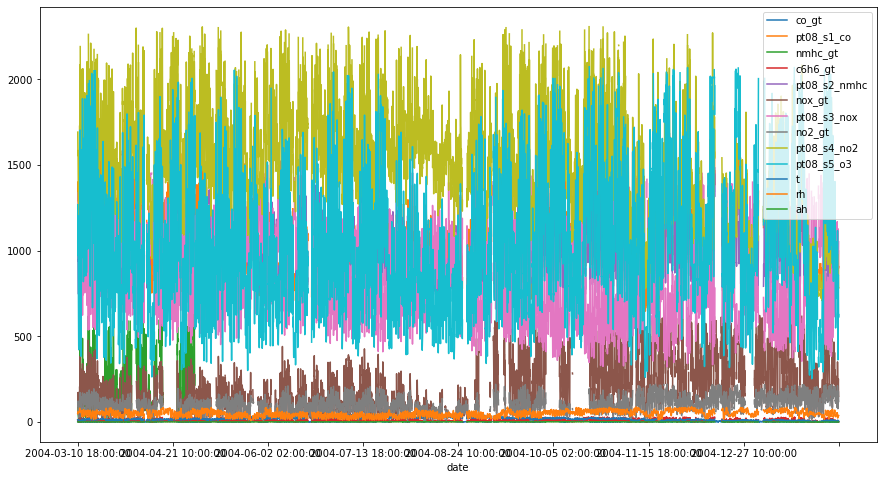

In [9]:
df.plot()

# Functions

In [10]:
# methode - replacement of NaN values by mean
def column_replace_na_by_mean(dframe, column):
    dframe[column] = dframe[column].fillna(feature_df.loc[column]["mean"])
    
    return dframe[column]

In [11]:
# methode - replacement of NaN values by historical data
def column_replace_na_by_lastvalue(dframe,column):
    dframe[column] = dframe[column].fillna(method= 'ffill')
    return dframe[column]

# Overview

## co_gt

<function matplotlib.pyplot.show(close=None, block=None)>

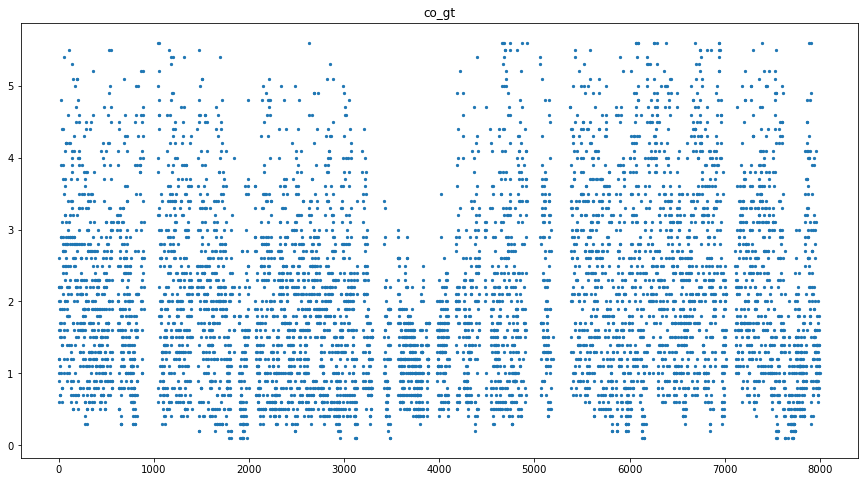

In [12]:
x_lst = df['co_gt'].reset_index(drop= True)
plt.title('co_gt')
plt.scatter(x_lst.index, x_lst.values, s=5)
plt.show

In [13]:
df.iloc[3205:3209]["co_gt"]

date
2004-07-22 07:00:00    4.4
2004-07-22 08:00:00    NaN
2004-07-22 09:00:00    NaN
2004-07-22 10:00:00    3.3
Name: co_gt, dtype: float64

In [14]:
df["co_gt"] = column_replace_na_by_mean(df,"co_gt")

In [15]:
df.iloc[3205:3209]["co_gt"]

date
2004-07-22 07:00:00    4.400000
2004-07-22 08:00:00    2.168604
2004-07-22 09:00:00    2.168604
2004-07-22 10:00:00    3.300000
Name: co_gt, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

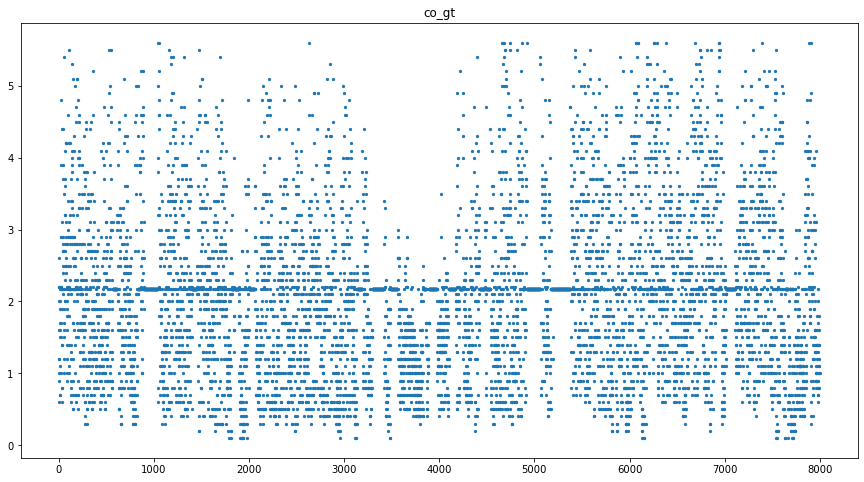

In [16]:
x_lst = df['co_gt'].reset_index(drop= True)
plt.title('co_gt')
plt.scatter(x_lst.index, x_lst.values, s=5)
plt.show

## pt08_s1_co

<function matplotlib.pyplot.show(close=None, block=None)>

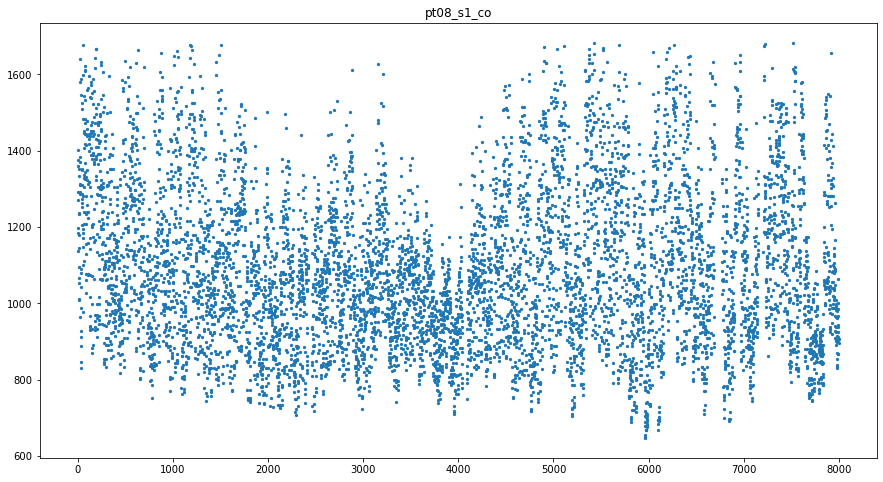

In [17]:
x_lst = df['pt08_s1_co'].reset_index(drop= True)
plt.title('pt08_s1_co')
plt.scatter(x_lst.index, x_lst.values, s=5)
plt.show

In [18]:
df["pt08_s1_co"] = column_replace_na_by_mean(df,"pt08_s1_co")

## c6h6_gt

<function matplotlib.pyplot.show(close=None, block=None)>

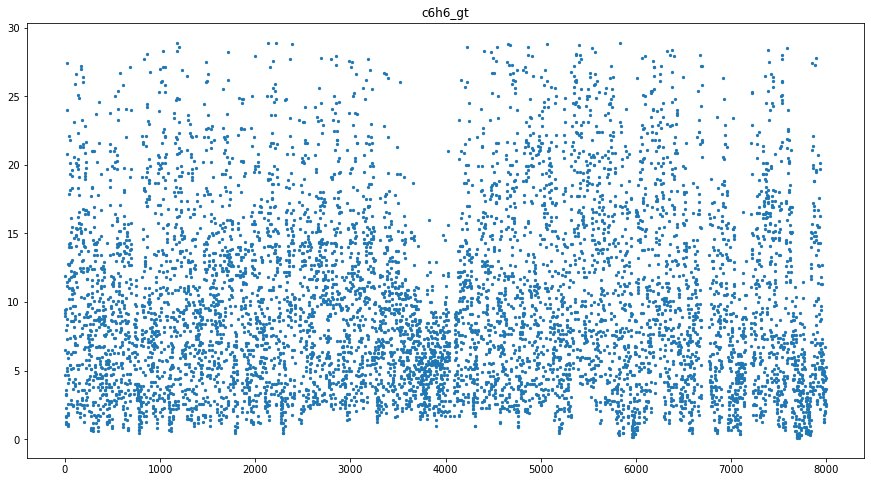

In [19]:
x_lst = df['c6h6_gt'].reset_index(drop= True)
plt.title('c6h6_gt')
plt.scatter(x_lst.index, x_lst.values, s=5)
plt.show

In [20]:
df["c6h6_gt"] = column_replace_na_by_mean(df,"c6h6_gt")

## pt08_s2_nmhc

<function matplotlib.pyplot.show(close=None, block=None)>

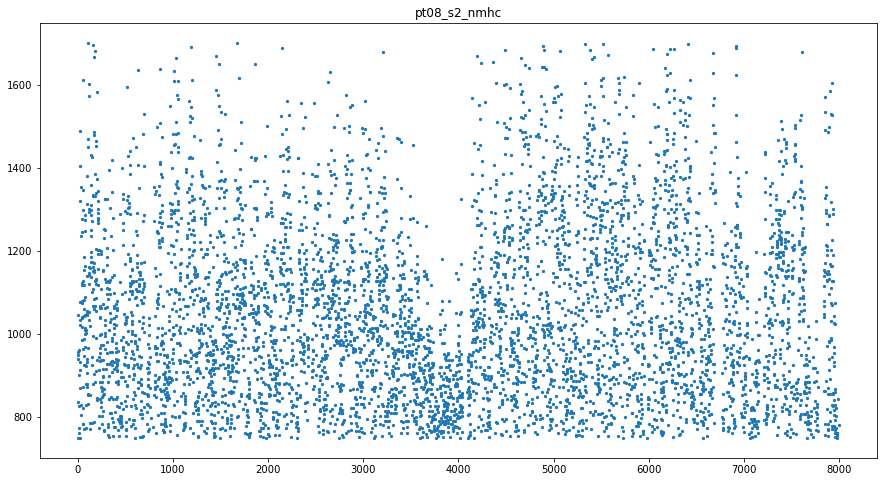

In [21]:
x_lst = df['pt08_s2_nmhc'].reset_index(drop= True)
plt.title('pt08_s2_nmhc')
plt.scatter(x_lst.index, x_lst.values, s=5)
plt.show

In [22]:
df["pt08_s2_nmhc"] = column_replace_na_by_mean(df,"pt08_s2_nmhc")

## nox_gt

<function matplotlib.pyplot.show(close=None, block=None)>

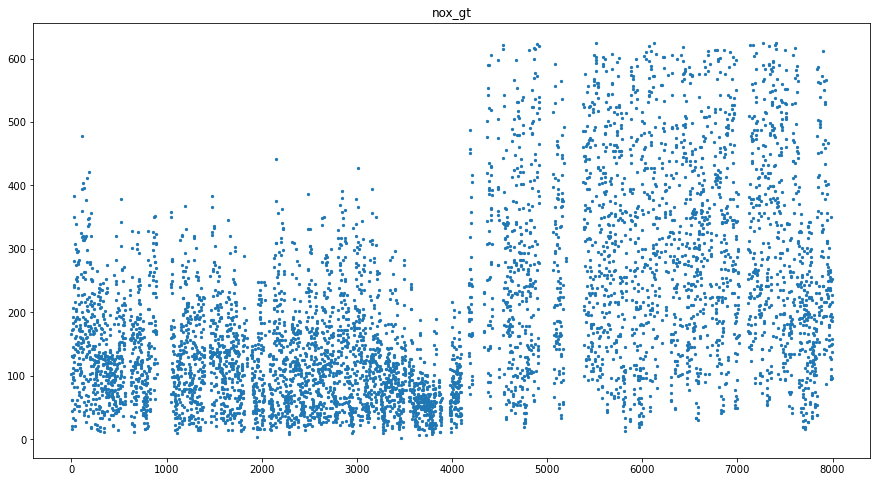

In [23]:
x_lst = df['nox_gt'].reset_index(drop= True)
plt.title('nox_gt')
plt.scatter(x_lst.index, x_lst.values, s=5)
plt.show

In [24]:
df["nox_gt"] = column_replace_na_by_lastvalue(df,"nox_gt")
#df["nox_gt"]= column_replace_na_by_mean(df,"nox_gt")

<function matplotlib.pyplot.show(close=None, block=None)>

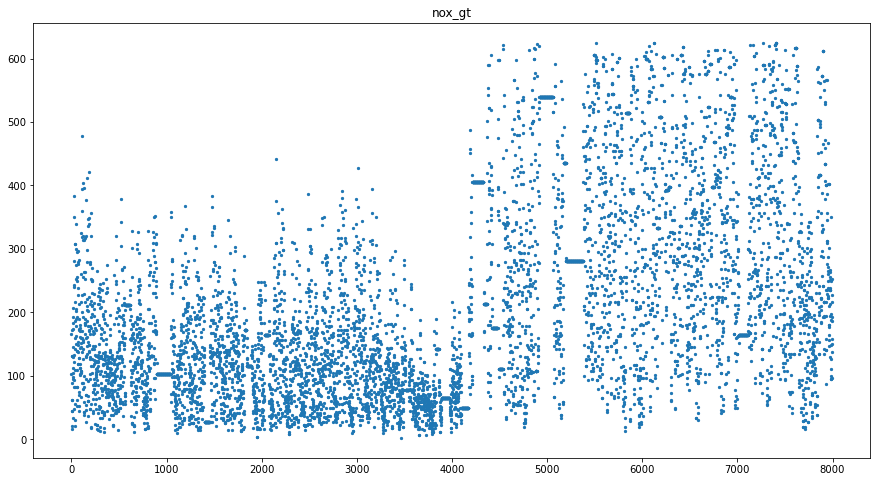

In [25]:
x_lst = df['nox_gt'].reset_index(drop= True)
plt.title('nox_gt')
plt.scatter(x_lst.index, x_lst.values, s=5)
plt.show

## pt08_s3_nox

<function matplotlib.pyplot.show(close=None, block=None)>

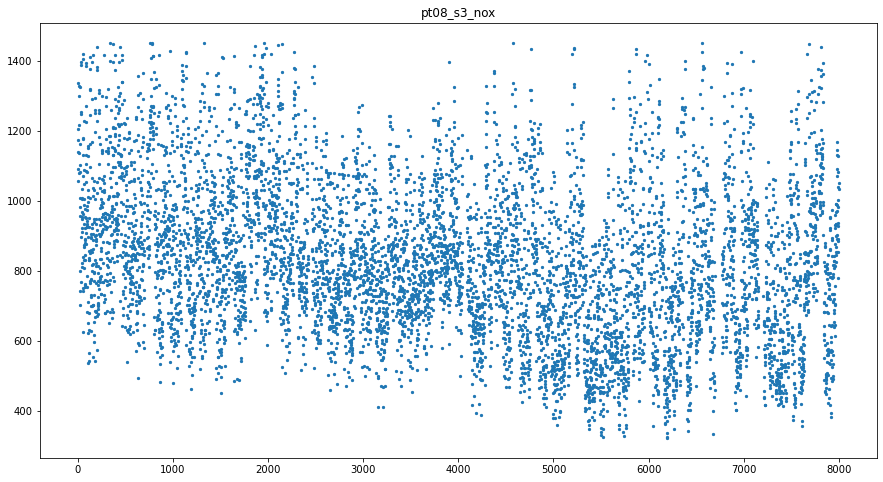

In [26]:
x_lst = df['pt08_s3_nox'].reset_index(drop= True)
plt.title('pt08_s3_nox')
plt.scatter(x_lst.index, x_lst.values, s=5)
plt.show

In [27]:
df["pt08_s3_nox"] = column_replace_na_by_mean(df,"pt08_s3_nox")

## no2_gt

<function matplotlib.pyplot.show(close=None, block=None)>

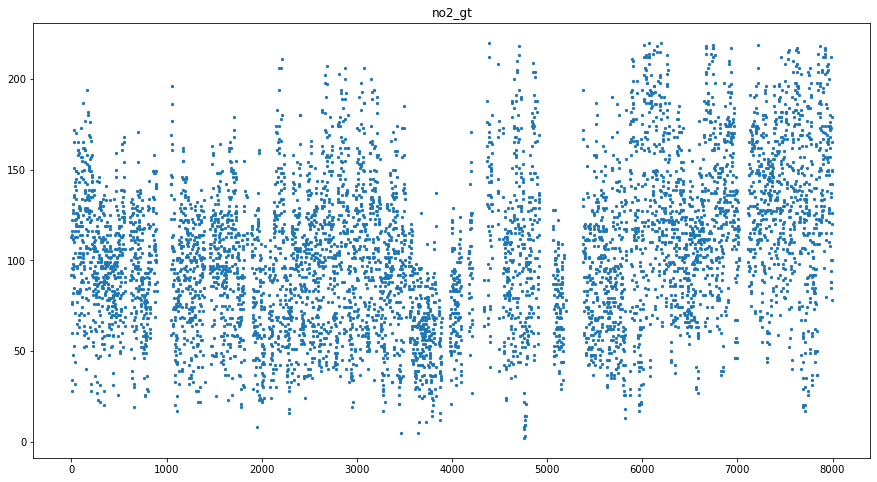

In [28]:
x_lst = df['no2_gt'].reset_index(drop= True)
plt.title('no2_gt')
plt.scatter(x_lst.index, x_lst.values, s=5)
plt.show

In [29]:
df["no2_gt"] = column_replace_na_by_mean(df,"no2_gt")

## pt08_s4_no2

<function matplotlib.pyplot.show(close=None, block=None)>

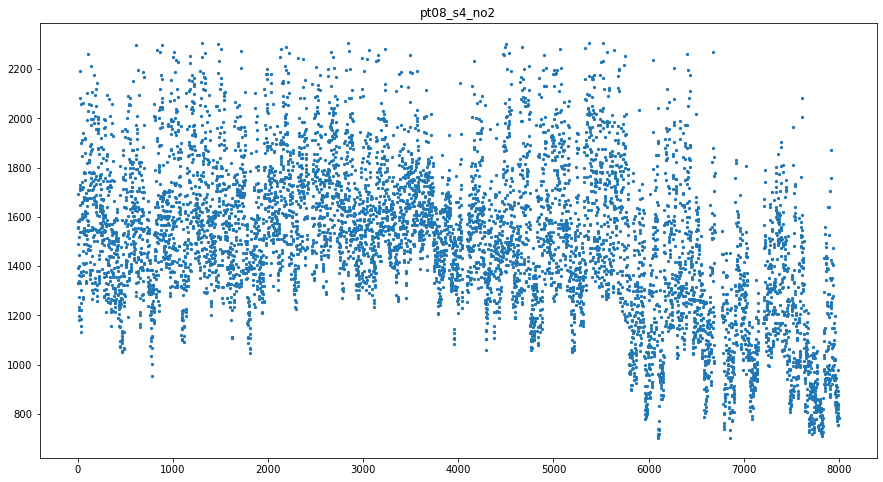

In [30]:
x_lst = df['pt08_s4_no2'].reset_index(drop= True)
plt.title('pt08_s4_no2')
plt.scatter(x_lst.index, x_lst.values, s=5)
plt.show

In [31]:
df["pt08_s4_no2"] = column_replace_na_by_lastvalue(df,"pt08_s4_no2")

## pt08_s5_o3

<function matplotlib.pyplot.show(close=None, block=None)>

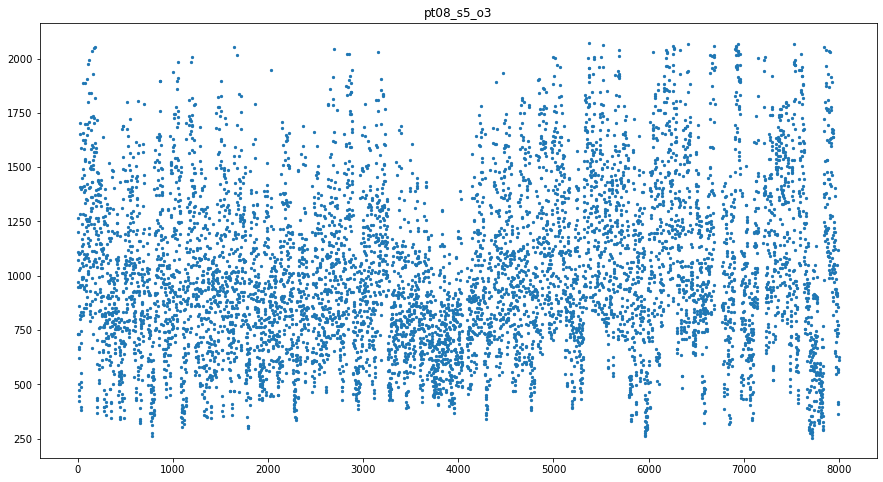

In [32]:
x_lst = df['pt08_s5_o3'].reset_index(drop= True)
plt.title('pt08_s5_o3')
plt.scatter(x_lst.index, x_lst.values, s=5)
plt.show

In [33]:
df["pt08_s5_o3"] = column_replace_na_by_mean(df,"pt08_s5_o3")

## t

<function matplotlib.pyplot.show(close=None, block=None)>

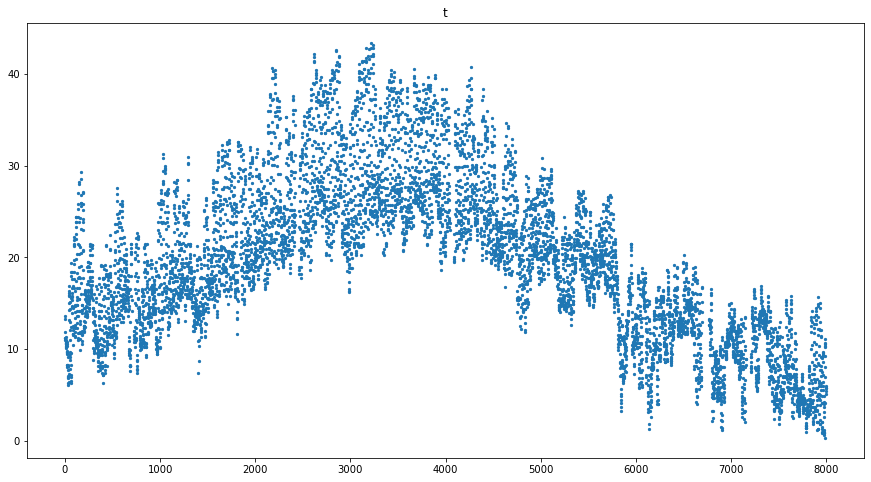

In [34]:
x_lst = df['t'].reset_index(drop= True)
plt.title('t')
plt.scatter(x_lst.index, x_lst.values, s=5)
plt.show

In [35]:
df["t"] = column_replace_na_by_lastvalue(df,"t")

## rh 

<function matplotlib.pyplot.show(close=None, block=None)>

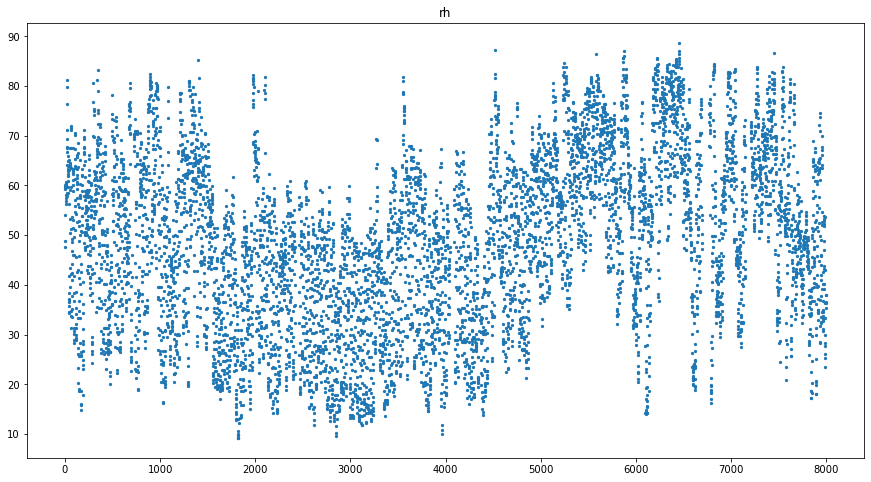

In [36]:
x_lst = df['rh'].reset_index(drop= True)
plt.title('rh')
plt.scatter(x_lst.index, x_lst.values, s=5)
plt.show

In [37]:
df["rh"] = column_replace_na_by_lastvalue(df,"rh")

## ah

<function matplotlib.pyplot.show(close=None, block=None)>

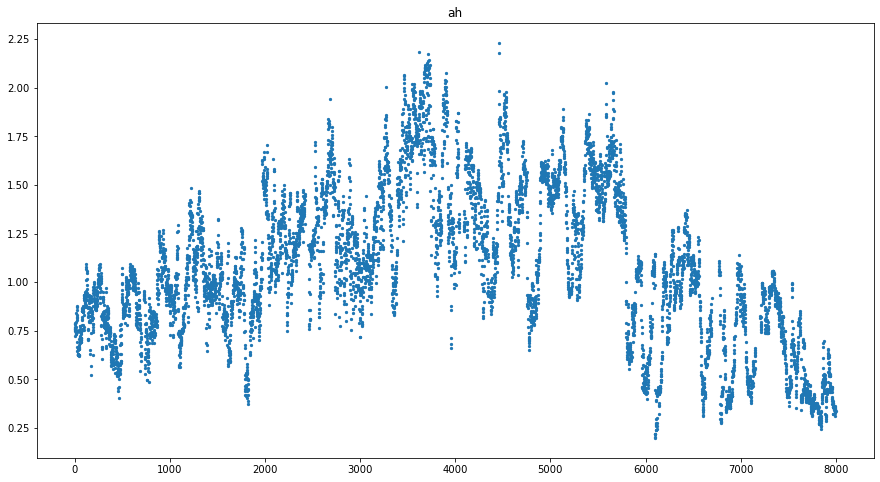

In [38]:
x_lst = df['ah'].reset_index(drop= True)
plt.title('ah')
plt.scatter(x_lst.index, x_lst.values, s=5)
plt.show

In [39]:
df["ah"] = column_replace_na_by_lastvalue(df,"ah")

## nmhc_gt

<function matplotlib.pyplot.show(close=None, block=None)>

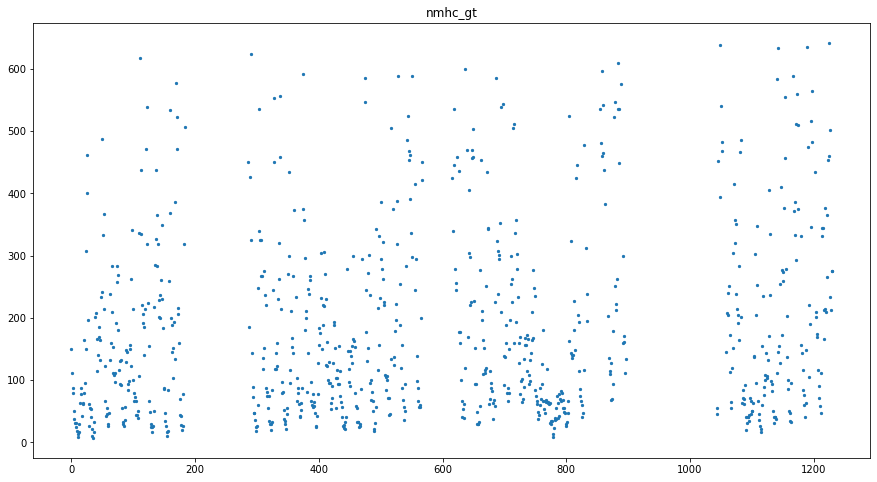

In [40]:
x_lst = df['nmhc_gt'].reset_index(drop= True)
plt.title('nmhc_gt')
plt.scatter(x_lst.index, x_lst.values, s=5)
plt.show

In [41]:
df['nmhc_gt'] = column_replace_na_by_mean(df,'nmhc_gt')

## ALL IN ONE

In [42]:
df = pd.read_csv(org.path("01_AirQuality_processed.csv"), sep=';')

In [43]:
from X2_MissingValueTreatment import df_replace_missing

treated_df = df_replace_missing(df)

In [44]:
treated_df

,date,co_gt,pt08_s1_co,nmhc_gt,c6h6_gt,pt08_s2_nmhc,nox_gt,pt08_s3_nox,no2_gt,pt08_s4_no2,pt08_s5_o3,t,rh,ah
0,2004-03-10 18:00:00,2.6,1360.0,150.000000,11.9,1046.000000,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-03-10 19:00:00,2.0,1292.0,112.000000,9.4,955.000000,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-03-10 20:00:00,2.2,1402.0,88.000000,9.0,939.000000,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-03-10 21:00:00,2.2,1376.0,80.000000,9.2,948.000000,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-03-10 22:00:00,1.6,1272.0,51.000000,6.5,836.000000,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7993,2005-02-06 19:00:00,1.6,985.0,218.607666,4.5,953.579453,227.0,891.0,165.0,875.0,774.0,6.0,38.0,0.3584
7994,2005-02-06 20:00:00,1.8,1002.0,218.607666,5.3,780.000000,252.0,855.0,179.0,892.0,857.0,5.8,36.4,0.3385
7995,2005-02-06 21:00:00,1.4,938.0,218.607666,3.7,953.579453,193.0,937.0,149.0,805.0,737.0,5.8,35.4,0.3286
7996,2005-02-06 22:00:00,1.1,896.0,218.607666,2.6,953.579453,158.0,1033.0,126.0,782.0,610.0,5.4,36.6,0.3304


In [45]:
treated_df.isnull().values.any()

False

## Speichern

In [46]:
# save dataset locally
new_path = org.path("02_AirQuality_processed.csv")
treated_df.to_csv(new_path, sep=';', index = False)